# Model Definition

### Student: David Anim-Addo

### Course: IBM Advanced Datascience Capstone

---

In [1]:
# import the required libraries for defining the model
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
%matplotlib inline 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.nn import relu
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


## Load and prepare the data for modeling

In [2]:
# The code was removed by Watson Studio for sharing.

,Country_Region,Dates,Population_2020,Density_(P/Km^2),Median_Age,Urban_Pct,Global_Confirmed,Global_Recovered,Global_Deaths
0,Afghanistan,2020-01-22,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0
1,Afghanistan,2020-01-23,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0
2,Afghanistan,2020-01-24,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0
3,Afghanistan,2020-01-25,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0
4,Afghanistan,2020-01-26,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14276 entries, 0 to 14275
Data columns (total 9 columns):
Country_Region      14276 non-null object
Dates               14276 non-null object
Population_2020     14276 non-null float64
Density_(P/Km^2)    14276 non-null float64
Median_Age          14276 non-null float64
Urban_Pct           14276 non-null float64
Global_Confirmed    14276 non-null float64
Global_Recovered    14276 non-null float64
Global_Deaths       14276 non-null float64
dtypes: float64(7), object(2)
memory usage: 1003.9+ KB


In [4]:
# convert values in the dates column to datetime
df_covid['Dates'] = pd.to_datetime(df_covid['Dates'])
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14276 entries, 0 to 14275
Data columns (total 9 columns):
Country_Region      14276 non-null object
Dates               14276 non-null datetime64[ns]
Population_2020     14276 non-null float64
Density_(P/Km^2)    14276 non-null float64
Median_Age          14276 non-null float64
Urban_Pct           14276 non-null float64
Global_Confirmed    14276 non-null float64
Global_Recovered    14276 non-null float64
Global_Deaths       14276 non-null float64
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1003.9+ KB


In [5]:
# convert the datetime values to matplotlib floats
df_covid['Dates'] = dates.date2num(df_covid['Dates'].values)
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14276 entries, 0 to 14275
Data columns (total 9 columns):
Country_Region      14276 non-null object
Dates               14276 non-null float64
Population_2020     14276 non-null float64
Density_(P/Km^2)    14276 non-null float64
Median_Age          14276 non-null float64
Urban_Pct           14276 non-null float64
Global_Confirmed    14276 non-null float64
Global_Recovered    14276 non-null float64
Global_Deaths       14276 non-null float64
dtypes: float64(8), object(1)
memory usage: 1003.9+ KB


In [6]:
df_covid['Country_Region'].value_counts().sum()

14276

## Analyze data for useful features

In [7]:
# use correlation to identify useful features
df_covid.corr()['Global_Deaths'].sort_values()

Density_(P/Km^2)   -0.011336
Urban_Pct           0.077347
Median_Age          0.134224
Dates               0.137582
Population_2020     0.156209
Global_Recovered    0.569970
Global_Confirmed    0.841233
Global_Deaths       1.000000
Name: Global_Deaths, dtype: float64

In [8]:
# The code was removed by Watson Studio for sharing.

,Country_Region,Population,Density_(P/Km^2),Median_Age,Urban_Pct,Total_Cases,Total_Recoveries,Total_Deaths
0,Afghanistan,1.438116e+09,153.0,38.0,0.61,665.0,32.0,21.0
1,Albania,1.377011e+09,464.0,28.0,0.35,467.0,232.0,23.0
2,Algeria,3.305788e+08,36.0,38.0,0.83,1983.0,601.0,313.0
3,Andorra,2.728843e+08,151.0,30.0,0.56,646.0,128.0,29.0
4,Angola,2.199225e+08,287.0,23.0,0.35,19.0,4.0,2.0
5,Antigua and Barbuda,2.122284e+08,25.0,33.0,0.88,23.0,0.0,2.0
6,Argentina,2.049681e+08,226.0,18.0,0.52,2208.0,515.0,97.0
7,Armenia,1.643273e+08,1265.0,28.0,0.39,1039.0,211.0,14.0
8,Australia,1.459210e+08,9.0,40.0,0.74,6351.0,1806.0,61.0
9,Austria,1.286334e+08,66.0,29.0,0.84,14041.0,7343.0,368.0


In [9]:
# review the correlation table for useful relationships
df_covid_corr.corr()['Total_Deaths'].sort_values()

Urban_Pct          -0.210339
Median_Age         -0.045881
Population         -0.043832
Density_(P/Km^2)   -0.025305
Total_Recoveries    0.660572
Total_Cases         0.867884
Total_Deaths        1.000000
Name: Total_Deaths, dtype: float64

In [10]:
# set the countries as the index
df_covid_index = df_covid.set_index(['Country_Region'])
df_covid_index.head()

,Dates,Population_2020,Density_(P/Km^2),Median_Age,Urban_Pct,Global_Confirmed,Global_Recovered,Global_Deaths
Country_Region,,,,,,,,
Afghanistan,737446.0,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0
Afghanistan,737447.0,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0
Afghanistan,737448.0,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0
Afghanistan,737449.0,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0
Afghanistan,737450.0,38728504.0,60.0,18.0,0.25,0.0,0.0,0.0


In [11]:
# selects the data from china only
df_covid_cn = df_covid_index.loc['China']
df_covid_cn.head()

,Dates,Population_2020,Density_(P/Km^2),Median_Age,Urban_Pct,Global_Confirmed,Global_Recovered,Global_Deaths
Country_Region,,,,,,,,
China,737446.0,1.438116e+09,153.0,38.0,0.61,548.0,28.0,17.0
China,737447.0,1.438116e+09,153.0,38.0,0.61,643.0,30.0,18.0
China,737448.0,1.438116e+09,153.0,38.0,0.61,920.0,36.0,26.0
China,737449.0,1.438116e+09,153.0,38.0,0.61,1406.0,39.0,42.0
China,737450.0,1.438116e+09,153.0,38.0,0.61,2075.0,49.0,56.0


In [12]:
df_covid_cn.shape

(83, 8)

## Create a scatterplot of China's data 

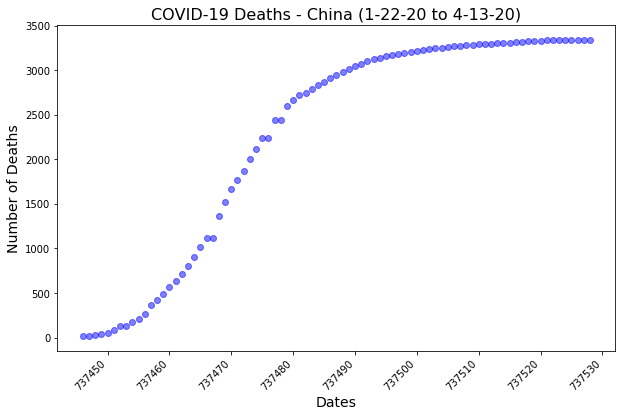

In [13]:
# graphs the selected x and y values as a scatterplot
fig, (ax) = plt.subplots(1, figsize=(10,6))

ax.scatter(x=df_covid_cn['Dates'], y=df_covid_cn['Global_Deaths'], c='blue', alpha=0.5)
ax.set_title('COVID-19 Deaths - China (1-22-20 to 4-13-20)', fontsize=16)
ax.set_ylabel('Number of Deaths', fontsize=14)
ax.set_xlabel('Dates', fontsize=14)

labels=ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

In [14]:
df_covid_cn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, China to China
Data columns (total 8 columns):
Dates               83 non-null float64
Population_2020     83 non-null float64
Density_(P/Km^2)    83 non-null float64
Median_Age          83 non-null float64
Urban_Pct           83 non-null float64
Global_Confirmed    83 non-null float64
Global_Recovered    83 non-null float64
Global_Deaths       83 non-null float64
dtypes: float64(8)
memory usage: 8.3+ KB


In [15]:
df_covid_cn.head()

,Dates,Population_2020,Density_(P/Km^2),Median_Age,Urban_Pct,Global_Confirmed,Global_Recovered,Global_Deaths
Country_Region,,,,,,,,
China,737446.0,1.438116e+09,153.0,38.0,0.61,548.0,28.0,17.0
China,737447.0,1.438116e+09,153.0,38.0,0.61,643.0,30.0,18.0
China,737448.0,1.438116e+09,153.0,38.0,0.61,920.0,36.0,26.0
China,737449.0,1.438116e+09,153.0,38.0,0.61,1406.0,39.0,42.0
China,737450.0,1.438116e+09,153.0,38.0,0.61,2075.0,49.0,56.0


## Fit the data to a logistic/sigmoidal regression model

In [16]:
# create a logistic model for the regression plot
def sigmoid(x: pd.DataFrame, beta_1: float, beta_2: float) -> float:
    '''builds a logistic regression function'''
    y = 1 / (1 + np.exp(-beta_1*(x-beta_2)))
    return y

In [17]:
# set the feature values for x and y
x_data = df_covid_cn['Dates'].values
y_data = df_covid_cn['Global_Deaths'].values

In [18]:
# Normalize the data before modeling
x_norm = x_data/max(x_data)
y_norm = y_data/max(y_data)

In [19]:
# enter a set of initial values
init_values = [10000, 1]

# fit the function to the data
popt, pcov = curve_fit(sigmoid, x_norm, y_norm, p0=init_values)

#print the final parameters for beta_1 and beta_2
print(f"beta_1 = {popt[0]: 0.4f}, beta_2 = {popt[1]: 0.4f}")

beta_1 =  105640.7644, beta_2 =  0.9999


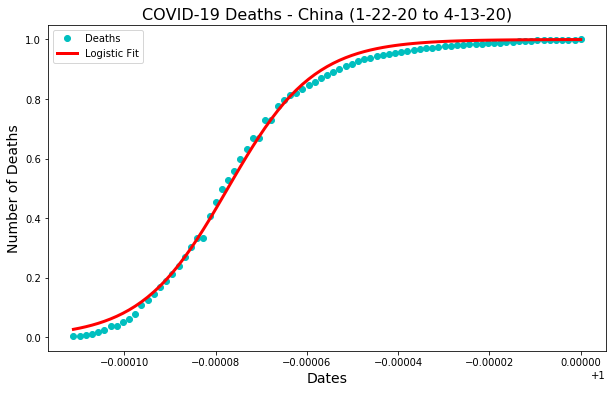

In [20]:
# plot the resulting regression model
plt.figure(figsize=(10,6))
x = x_norm
y = sigmoid(x, *popt)
plt.plot(x_norm, y_norm, 'co', label='Deaths') # scatter plot of data
plt.plot(x,y, linewidth=3.0, c='r', label='Logistic Fit') # regression curve
plt.legend(loc='best')
plt.title('COVID-19 Deaths - China (1-22-20 to 4-13-20)', fontsize=16)
plt.ylabel('Number of Deaths', fontsize=14)
plt.xlabel('Dates', fontsize=14)
plt.show()

## Create test and training data for the models

In [21]:
# split the data into train and test samples
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2, random_state=4)

##  Train and evaluate the logistic model

In [22]:
# build the model using the train set
popt2, pcov2 = curve_fit(sigmoid, x_train, y_train, p0=init_values)
                         
# predict the values using the test set
y_hat = sigmoid(x_test, *popt2)

# calculate evaluation metrics
mae_log = (np.absolute(y_hat - y_test)).mean()
rmsle_log = np.sqrt(((np.log(y_hat+1) - np.log(y_test+1))**2).mean())
rmse_log = np.sqrt(((y_hat - y_test)**2).mean())

# print the metrics
print(f"Mean Absolute Error: {mae_log: 0.5f}")
print(f"Root Mean Squared Logarithmic Error: {rmsle_log: 0.5f}")
print(f"Root Mean Squared Error: {rmse_log: 0.5f}")


Mean Absolute Error:  0.01563
Root Mean Squared Logarithmic Error:  0.01311
Root Mean Squared Error:  0.01918


## Train and evaluate a Gradient Boosting Regression Model

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# set the parameters
params = {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.5, 'criterion': 'friedman_mse'}

# reshape the arrays without changing the data
x_train_r = x_train.reshape(-1,1) 
x_test_r = x_test.reshape(-1,1)

# define the model
gbr = GradientBoostingRegressor(**params)

# train the model
gbr.fit(x_train_r, y_train)

# use the model to predict
y_hat_gbr = gbr.predict(x_test_r)

# calculate evaluation metrics
mae_gbr = (np.absolute(y_hat_gbr - y_test)).mean()
rmsle_gbr = np.sqrt(((np.log(y_hat_gbr+1) - np.log(y_test+1))**2).mean())
rmse_gbr = np.sqrt(((y_hat_gbr - y_test)**2).mean())

# print the metrics
print(f"Mean Absolute Error: {mae_gbr: 0.5f}")
print(f"Root Mean Squared Logarithmic Error: {rmsle_gbr: 0.5f}")
print(f"Root Mean Squared Error: {rmse_gbr: 0.5f}")


Mean Absolute Error:  0.00928
Root Mean Squared Logarithmic Error:  0.01019
Root Mean Squared Error:  0.01421


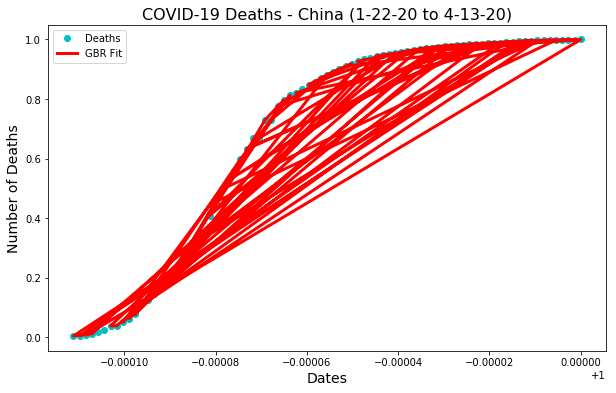

In [24]:
# plot the resulting regression model

plt.figure(figsize=(10,6))
plt.plot(x_norm, y_norm, 'co', label='Deaths') # scatter plot of data
plt.plot(x_train_r,gbr.predict(x_train_r), linewidth=3.0, c='r', label='GBR Fit') # grad boosted reg
plt.legend(loc='best')
plt.title('COVID-19 Deaths - China (1-22-20 to 4-13-20)', fontsize=16)
plt.ylabel('Number of Deaths', fontsize=14)
plt.xlabel('Dates', fontsize=14)
plt.show()

## Train and evaluate the data with a neural network regression

In [25]:
# create a neural network for regression

reg_model = Sequential()

# the input layer with 1 input dimension:
reg_model.add(Dense(16, kernel_initializer='normal',input_dim = 1, activation='relu'))

# create hidden layers:
reg_model.add(Dense(8, kernel_initializer='normal',activation='relu'))

# create the output layer:
reg_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# compile the network :
reg_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# fit the nn regression model
reg_model.fit(x_train, y_train, epochs=10, batch_size=40, verbose=1, validation_split = 0.2)

Instructions for updating:
Colocations handled automatically by placer.
Train on 52 samples, validate on 14 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
52/52 [==============================] - 1s 13ms/sample - loss: 0.3576 - mean_absolute_error: 0.3576 - val_loss: 0.4584 - val_mean_absolute_error: 0.4584
Epoch 2/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.3574 - mean_absolute_error: 0.3574 - val_loss: 0.4580 - val_mean_absolute_error: 0.4580
Epoch 3/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.3572 - mean_absolute_error: 0.3572 - val_loss: 0.4577 - val_mean_absolute_error: 0.4577
Epoch 4/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.3571 - mean_absolute_error: 0.3571 - val_loss: 0.4573 - val_mean_absolute_error: 0.4573
Epoch 5/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.3570 - mean_absolute_error: 0.3570 - val_loss: 0.4570 - val_mean_absolute_error: 0.4570
Epoch 6/10
52/5

In [26]:
# evaluate the nn regression model
y_hat_nn = reg_model.predict(x_test)

# calculate evaluation metrics
mae_nn = (np.absolute(y_hat_nn - y_test)).mean()
rmsle_nn = np.sqrt(((np.log(y_hat_nn+1) - np.log(y_test+1))**2).mean())
rmse_nn = np.sqrt(((y_hat_nn - y_test)**2).mean())

# print the metrics
print(f"Mean Absolute Error: {mae_nn: 0.5f}")
print(f"Root Mean Squared Logarithmic Error: {rmsle_nn: 0.5f}")
print(f"Root Mean Squared Error: {rmse_nn: 0.5f}")


Mean Absolute Error:  0.39494
Root Mean Squared Logarithmic Error:  0.26015
Root Mean Squared Error:  0.41089


## Modify the features for the neural network and re-evaluate

In [27]:
# create features of the best correlated data
X_nn = df_covid_cn.iloc[:, 5:7].values
X_nn[0:5]

array([[ 548.,   28.],
       [ 643.,   30.],
       [ 920.,   36.],
       [1406.,   39.],
       [2075.,   49.]])

In [28]:
Y_nn = df_covid_cn.iloc[:,-1:].values
Y_nn[0:5]

array([[17.],
       [18.],
       [26.],
       [42.],
       [56.]])

In [29]:
X_nn[0] = X_nn[0]/max(X_nn[0])
X_nn[1] = X_nn[1]/max(X_nn[1])

X_nn[0:5]

array([[1.00000000e+00, 5.10948905e-02],
       [1.00000000e+00, 4.66562986e-02],
       [9.20000000e+02, 3.60000000e+01],
       [1.40600000e+03, 3.90000000e+01],
       [2.07500000e+03, 4.90000000e+01]])

In [30]:
# normalize the target
Y_nn = Y_nn/max(Y_nn)
Y_nn[0:5]

array([[0.00508221],
       [0.00538117],
       [0.0077728 ],
       [0.01255605],
       [0.01674141]])

## Train and evaluate the data again with a neural network regression

In [31]:
# split the data into train and test samples
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, Y_nn, test_size=0.2, random_state=4)

In [32]:
# create a neural network for regression

reg_model = Sequential()

# the input layer with 2 input dimensions:
reg_model.add(Dense(16, kernel_initializer='normal',input_dim = 2, activation='relu'))

# create hidden layers:
reg_model.add(Dense(8, kernel_initializer='normal',activation='relu'))

# create the output layer:
reg_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# compile the network :
reg_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# fit the nn regression model
reg_model.fit(x_train_nn, y_train_nn, epochs=10, batch_size=40, verbose=1, validation_split = 0.2)

Train on 52 samples, validate on 14 samples
Epoch 1/10
52/52 [==============================] - 1s 11ms/sample - loss: 0.2921 - mean_absolute_error: 0.2921 - val_loss: 0.8246 - val_mean_absolute_error: 0.8246
Epoch 2/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.5554 - mean_absolute_error: 0.5554 - val_loss: 0.1044 - val_mean_absolute_error: 0.1044
Epoch 3/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.1983 - mean_absolute_error: 0.1983 - val_loss: 0.0805 - val_mean_absolute_error: 0.0805
Epoch 4/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.1560 - mean_absolute_error: 0.1560 - val_loss: 0.0939 - val_mean_absolute_error: 0.0939
Epoch 5/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.2074 - mean_absolute_error: 0.2074 - val_loss: 0.0883 - val_mean_absolute_error: 0.0883
Epoch 6/10
52/52 [==============================] - 0s 1ms/sample - loss: 0.1609 - mean_absolute_error: 0.1609 - val_loss: 0.0748 - val

In [33]:
# evaluate the nn regression model
y_hat_nn2 = reg_model.predict(x_test_nn)

# calculate evaluation metrics
mae_nn2 = (np.absolute(y_hat_nn2 - y_test_nn)).mean()
rmsle_nn2 = np.sqrt(((np.log(y_hat_nn2+1) - np.log(y_test_nn+1))**2).mean())
rmse_nn2 = np.sqrt(((y_hat_nn2 - y_test_nn)**2).mean())

# print the metrics
print(f"Mean Absolute Error: {mae_nn2: 0.5f}")
print(f"Root Mean Squared Logarithmic Error: {rmsle_nn2: 0.5f}")
print(f"Root Mean Squared Error: {rmse_nn2: 0.5f}")


Mean Absolute Error:  0.14185
Root Mean Squared Logarithmic Error:  0.17393
Root Mean Squared Error:  0.21858


## Compare the evaluation metrics of all the models

In [37]:
eval_matrix = {'Methods':['Mean Absolute Error', 'Root Mean Squared Logarithmic Error', 'Root Mean Squared Error'], 'Logistic':[mae_log, rmsle_log, rmse_log], 
               'Gradient Boosted Regression':[mae_gbr, rmsle_gbr, rmse_gbr], 'Neural Network Regression':[mae_nn2, rmsle_nn2, rmse_nn2]}
eval_matrix = pd.DataFrame(eval_matrix)

eval_matrix

,Methods,Logistic,Gradient Boosted Regression,Neural Network Regression
0,Mean Absolute Error,0.015633,0.009276,0.141847
1,Root Mean Squared Logarithmic Error,0.013112,0.010187,0.173925
2,Root Mean Squared Error,0.019184,0.014207,0.218584
